参考：https://blog.csdn.net/CSDN2497242041/article/details/77175112?locationNum=5&fps=1

# 读入txt文本数据

In [1]:
text = open(r'/Users/ycy/Desktop/yaochuyi.txt',"r").read()

# 结巴分词

In [2]:
import matplotlib.pyplot as plt     #数学绘图库
import jieba               #分词库
from wordcloud import WordCloud   #词云库

#默认精确模式。可以添加自定义词典userdict.txt,然后jieba.load_userdict(file_name) ,file_name为文件类对象或自定义词典的路径
# 自定义词典格式和默认词库dict.txt一样，一个词占一行：每一行分三部分：词语、词频（可省略）、词性（可省略），用空格隔开，顺序不可颠倒

cut_text= jieba.cut(text)
result= "/".join(cut_text)#必须给个符号分隔开分词结果来形成字符串,否则不能绘制词云
#print(result)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ly/0kbp6nyx09x0763nh3z02ll80000gn/T/jieba.cache
Loading model cost 0.824 seconds.
Prefix dict has been built succesfully.


# 生成词云图

In [3]:
#这里需要注意的是WordCloud默认不支持中文，所以这里需已下载好的中文字库
#无自定义背景图：需要指定生成词云图的像素大小，默认背景颜色为黑色,统一文字颜色：mode='RGBA'和colormap='pink'
# wc = WordCloud(font_path=r"System/Library/Fonts/STHeiti Medium.ttc",background_color='white',width=800,height=600,max_font_size=50,
#               max_words=500)#,min_font_size=10)#,mode='RGBA',colormap='pink')
wc_1 = WordCloud(font_path=r"System/Library/Fonts/STHeiti Medium.ttc",max_font_size=50)#,min_font_size=10)#,mode='RGBA',colormap='pink')
wc_1.generate(result)
wc_1.to_file(r"/Users/ycy/Desktop/wordcloud_1.png") #按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰

# 显示图片

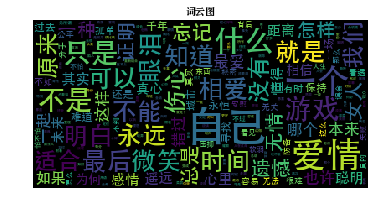

In [4]:
from matplotlib.font_manager import FontProperties


font = FontProperties(fname="/Library/Fonts/Songti.ttc")
plt.title(u"词云图", fontproperties=font) #指定所绘图名称
#plt.title(u"按年龄看获救分布 (1为获救)", fontproperties=font)
plt.imshow(wc_1)       # 以图片的形式显示词云
plt.axis("off")      #关闭图像坐标系
plt.show()

# 自定义背景图

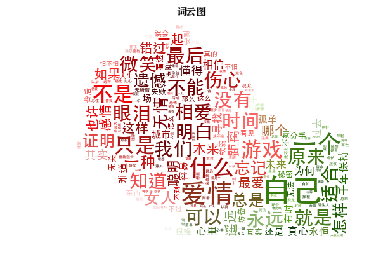

In [5]:
import matplotlib.pyplot as plt                          #数学绘图库  
from PIL import Image  
import numpy as np                                      #科学数值计算包，可用来存储和处理大型矩阵  
import jieba                                            #分词库  
from wordcloud import WordCloud, ImageColorGenerator   #词云库  
  
#1、读入txt文本数据  
text = open(r'/Users/ycy/Desktop/yaochuyi.txt',"r").read()  
  
# 2、结巴分词:cut_all参数可选, True为全模式，False为精确模式,默认精确模式  
cut_text= jieba.cut(text,cut_all=False)  
result= "/".join(cut_text)#必须给个符号分隔开分词结果,否则不能绘制词云  
  
#3、初始化自定义背景图片  
image = Image.open(r'/Users/ycy/Desktop/rose.jpg')  
graph = np.array(image)  
  
#4、产生词云图  
#有自定义背景图：生成词云图由自定义背景图像素大小决定  
wc_2 = WordCloud(font_path=r"System/Library/Fonts/STHeiti Medium.ttc",background_color='white',max_font_size=50,mask=graph)  
wc_2.generate(result)  
  
#5、绘制文字的颜色以背景图颜色为参考  
image_color = ImageColorGenerator(graph)#从背景图片生成颜色值  
wc_2.recolor(color_func=image_color)  
wc_2.to_file(r"/Users/ycy/Desktop/wordcloud_2.png") #按照背景图大小保存绘制好的词云图，比下面程序显示更清晰  
  
# 6、显示图片  
plt.title(u"词云图", fontproperties=font)
plt.imshow(wc_2)         # 以图片的形式显示词云  
plt.axis("off")       # 关闭图像坐标系  
plt.show()  